<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea%204/Tarea_4_Algebra_Lineal_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 4. ÁLGEBRA LINEAL**

**Capítulo 5. Álgebra lineal**



**Punto 1.**

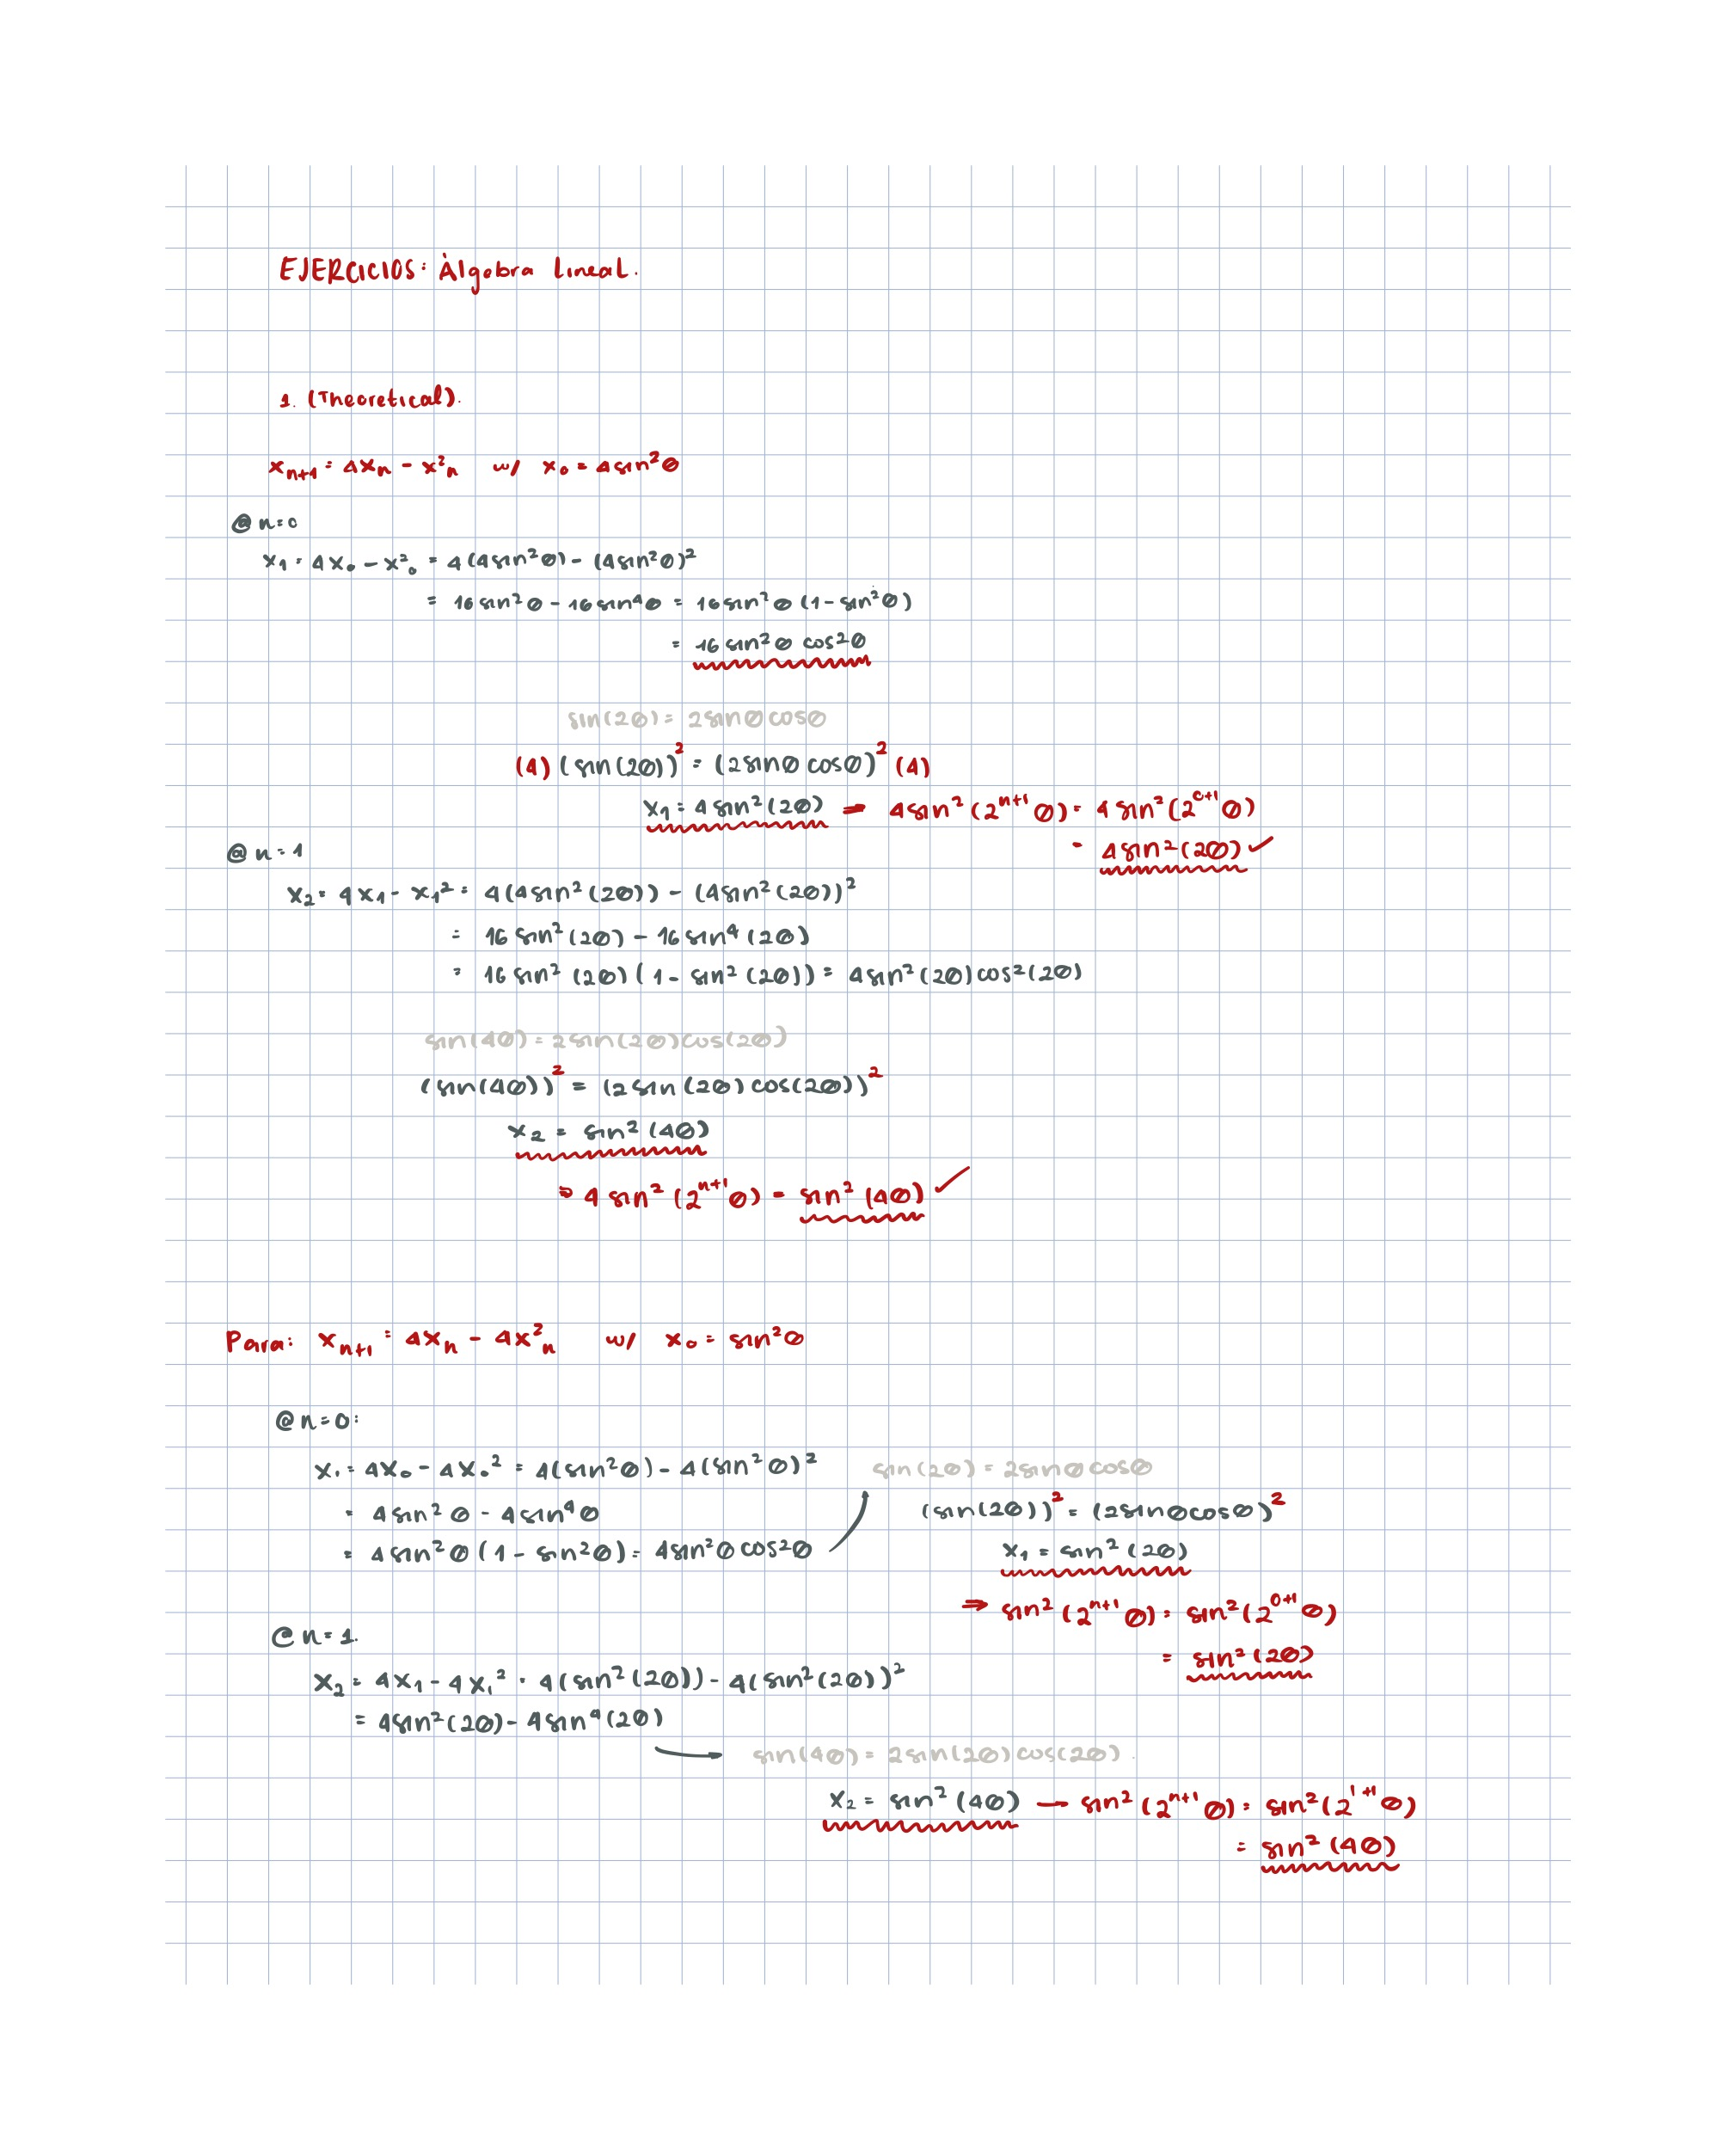

**Punto 2.** Implemente el algoritmo de Gaus-Seidel para resolver el sistema de ecuaciones visto en
clase.

In [252]:

def seidel(a, x ,b):
	n = len(a)

	for j in range(0, n):
		d = b[j]

		for i in range(0, n):
			if(j != i):
				d-=a[j][i] * x[i]

		x[j] = d / a[j][j]

	return x

n = 3
a = []
b = []

# solucion inicial
x = [0, 0, 0]
a = [[3, -1, -1],[-1, 3, 1],[2, 1, 4]]
b = [1,3,7]
print(x)


for i in range(0, 25):
	x = seidel(a, x, b)
	print(x)


[0, 0, 0]
[0.3333333333333333, 1.1111111111111112, 1.3055555555555554]
[1.1388888888888888, 0.9444444444444446, 0.9444444444444444]
[0.9629629629629631, 1.006172839506173, 1.016975308641975]
[1.0077160493827162, 0.9969135802469137, 0.9969135802469136]
[0.9979423868312759, 1.0003429355281208, 1.0009430727023318]
[1.0004286694101507, 0.9998285322359397, 0.9998285322359397]
[0.9998856881572932, 1.0000190519737846, 1.0000523929279073]
[1.0000238149672305, 0.9999904740131077, 0.9999904740131079]
[0.9999936493420719, 1.0000010584429881, 1.000002910718217]
[1.000001323053735, 0.9999994707785061, 0.9999994707785059]
[0.9999996471856707, 1.0000000588023883, 1.0000001617065677]
[1.0000000735029853, 0.9999999705988057, 0.9999999705988061]
[0.9999999803992039, 1.0000000032667993, 1.0000000089836982]
[1.000000004083499, 0.9999999983666003, 0.9999999983666005]
[0.999999998911067, 1.0000000001814888, 1.0000000004990943]
[1.000000000226861, 0.9999999999092557, 0.9999999999092555]
[0.9999999999395038, 

**Punto 3**

In [253]:
import numpy as np

In [254]:
class Matrices():
      def __init__(self, A, B,x0):
         self.A = A
         self.B = B
         self.x = x0.copy()
         self. it =0
         self.itmax = 1000

In [255]:
class Jacobi(Matrices):
   def __init__(self,A,B,x0):
        super().__init__(A, B, x0)
   def solve(self):
        n = len(self.B)
        xn = np.zeros_like(self.x)
        for it in range(self.itmax):
          for i in range(n):
            Suma = 0.
            for j in range(n):
              if i != j:
                Suma += self.A[i,j]* self.x[j]
            xn[i] = (self.B[i] - Suma)/self.A[i,i]
          if np.linalg.norm(xn - self.x, ord=np.inf) < 1e-6:
                  self.it = it + 1
                  return xn, self.it

              # NUEVO X PARA LA siguiente iteración
          self.x = xn.copy()

        return self.x, self.itmax

In [256]:
#Prueba con el sistema visto en clase
x = np.zeros(3)
A = np.array([[3, -1, -1],[-1, 3, 1],[2, 1, 4]])
B = np.array([1,3,7])
JacobiMethod = Jacobi(A,B,x)
solucion, iteraciones = JacobiMethod.solve()
print("Solución:", solucion)
print("Número de iteraciones:", iteraciones)


Solución: [1.00000001 0.99999957 1.00000031]
Número de iteraciones: 14


In [257]:
class Matrices():
      def __init__(self, A, B,x0):
         self.A = A
         self.B = B
         self.x = x0.copy()
         self. it =0
         self.itmax = 1000

class GaussSeidel(Matrices):
  def __init__(self, A, B, x0):
      super().__init__(A, B, x0)

  def SolveGS(self):
    n = len(self.A)
    xn = self.x.copy()
    for it in range(self.itmax):
      for j in range(0, n):
        d = self.B[j]
        for i in range(0, n):
          if(j != i):
            d-= self.A[j][i] * xn[i]

        xn[j] = d / self.A[j][j]
        if np.linalg.norm(xn - self.x, ord=np.inf) < 1e-6:
                  self.it = it + 1  # Guardamos el número de iteraciones
                  return xn, self.it
        self.x = xn.copy()

    return xn, self.itmax

In [258]:
#Prueba
x = np.zeros(3)
A = np.array([[3., -1., -1.],[-1., 3., 1.],[2., 1., 4.]])
B = np.array([1.,3.,7.])
GSMethod = GaussSeidel(A,B,x)
solucion, iteraciones = GSMethod.SolveGS()
print("Solución:", solucion)
print("Número de iteraciones:", iteraciones)

Solución: [0.99999965 1.00000006 0.99999947]
Número de iteraciones: 11


**Punto 4**

In [259]:
import numpy as np

In [260]:
A = np.array([[1, 0, 0], [5, 1, 0], [-2, 3, 1]])
B = np.array([[4, -2, 1], [0, 3, 7], [0, 0, 2]])

In [261]:
def matrixmultiplication(A, B):
    C = np.zeros((len(A), len(B[0])))
    for i in range(len(A)):
      for j in range(len(B[0])):
        for k in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]
    return C

**Punto 5 y 6.**

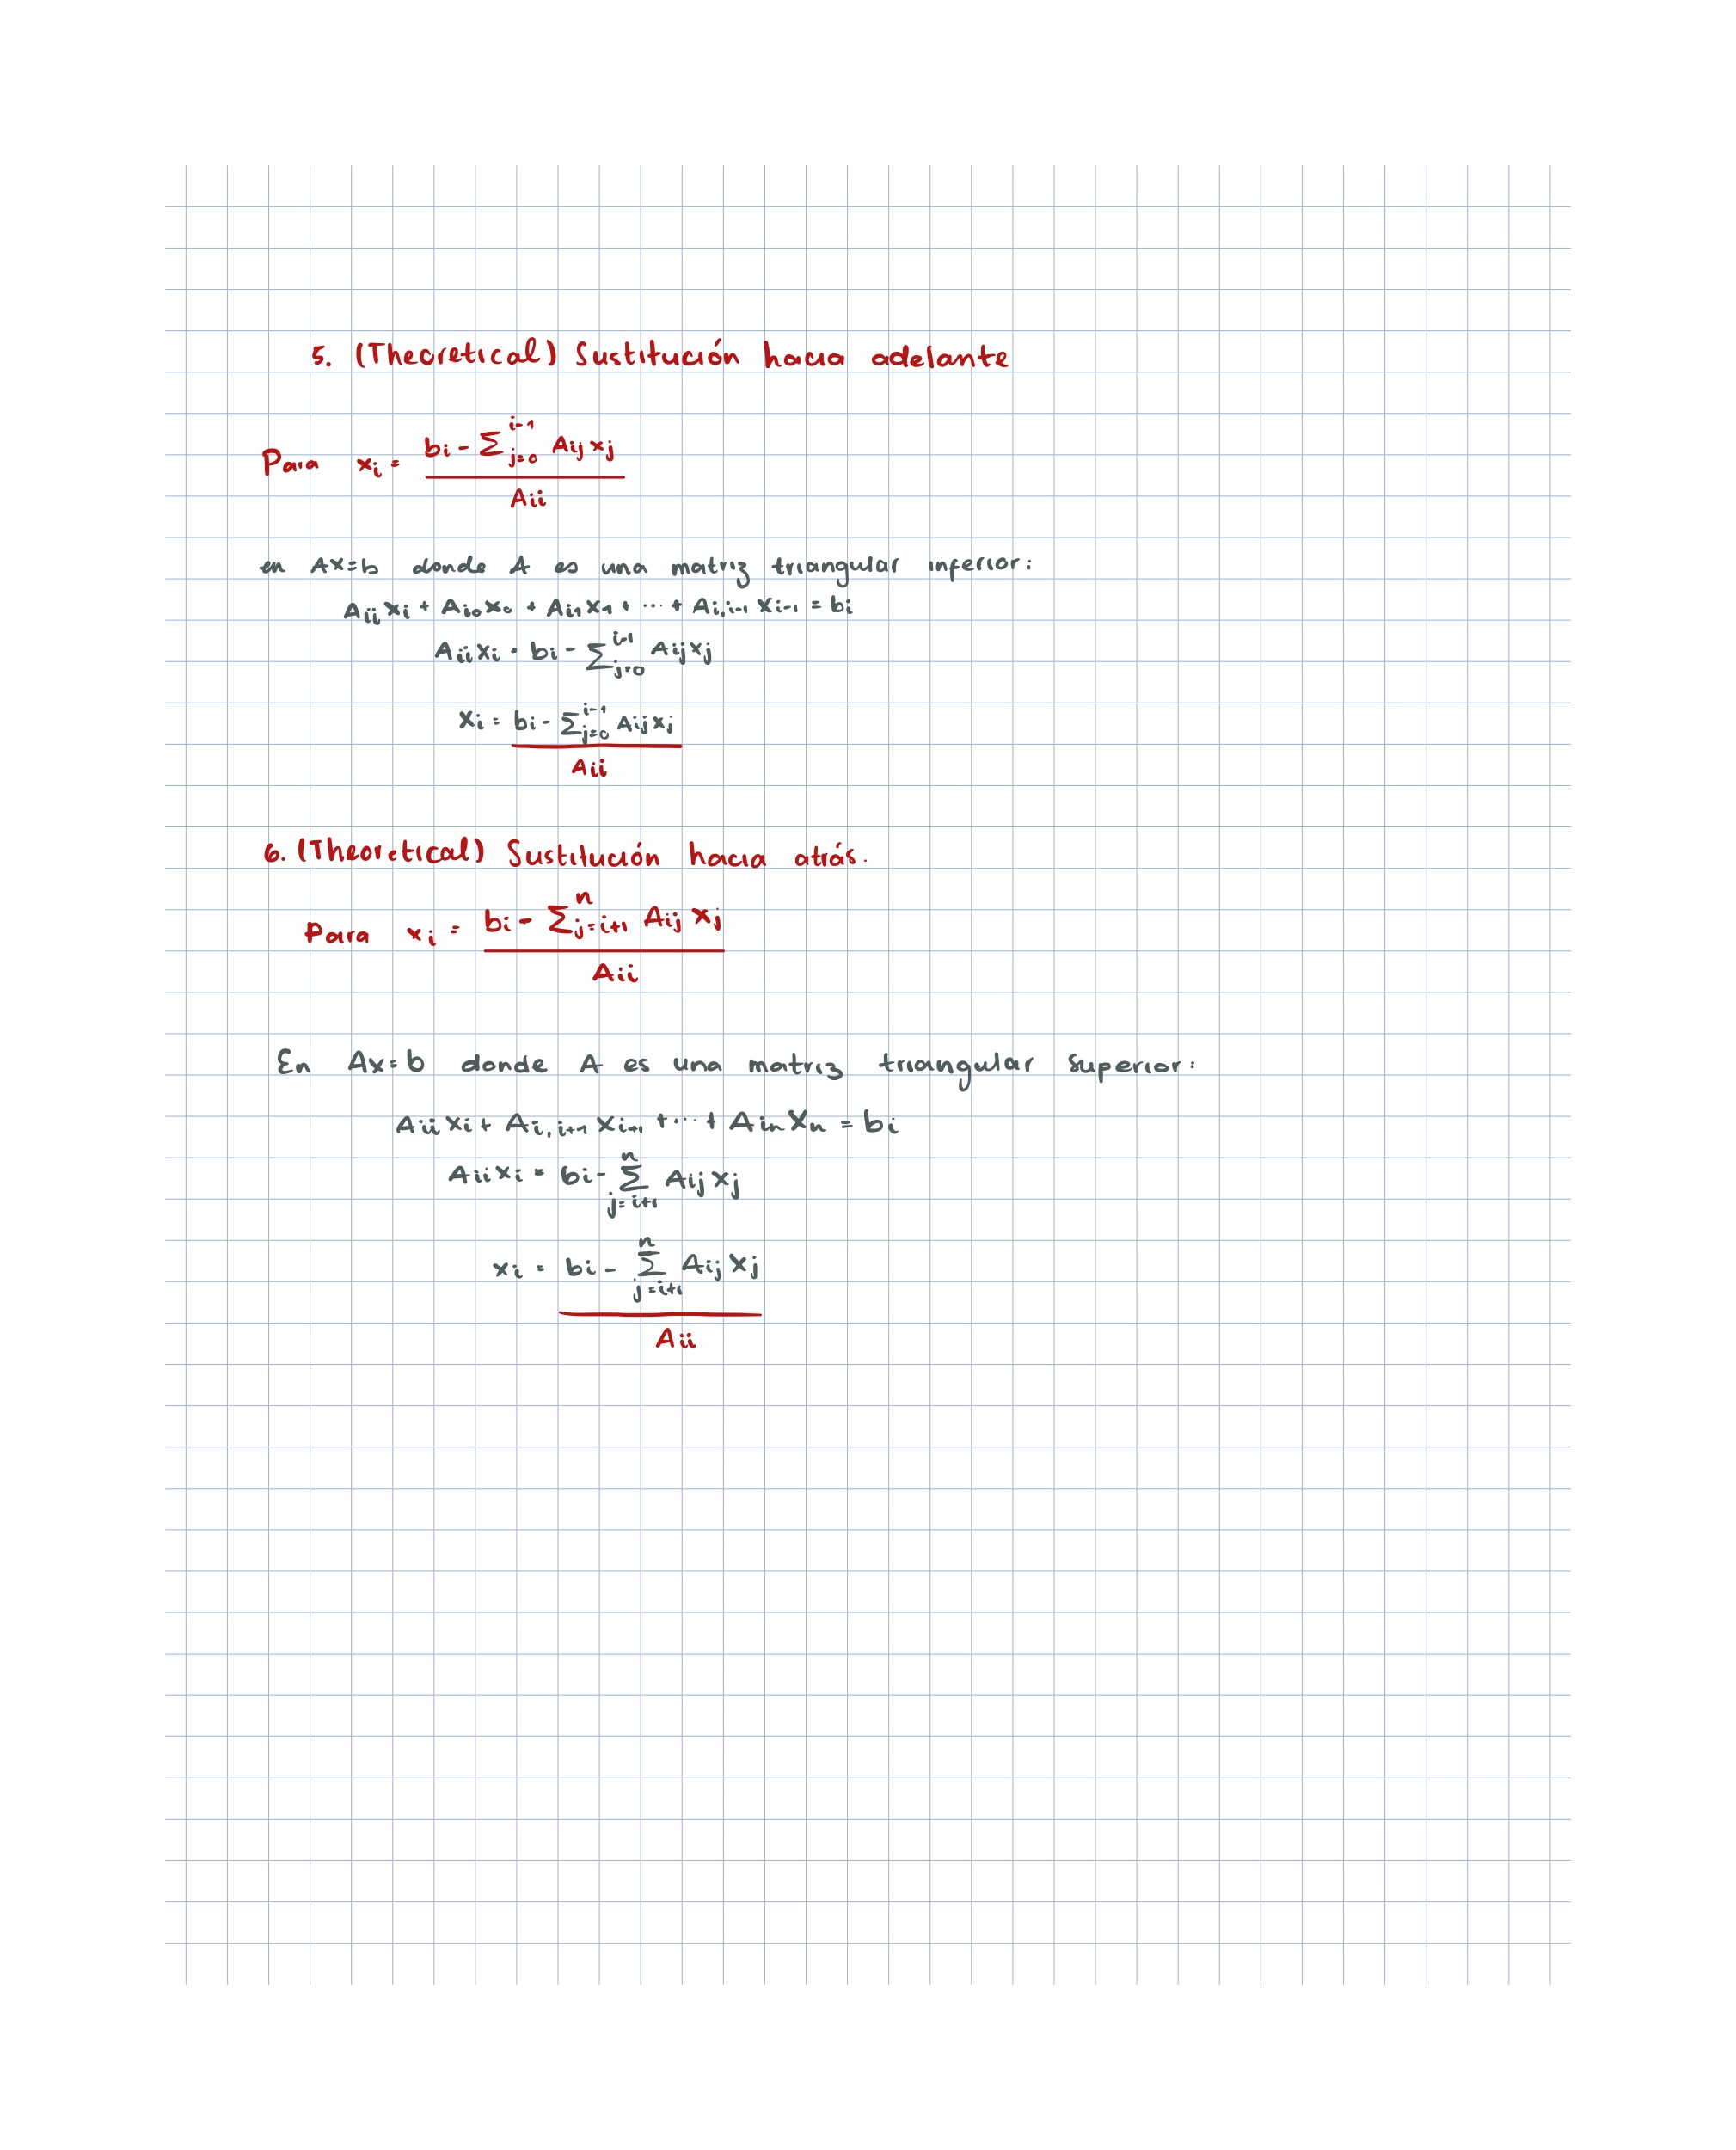

**Punto 8.** Implemente la descomposicion LU para factorizar la siguiente matriz A = LU.
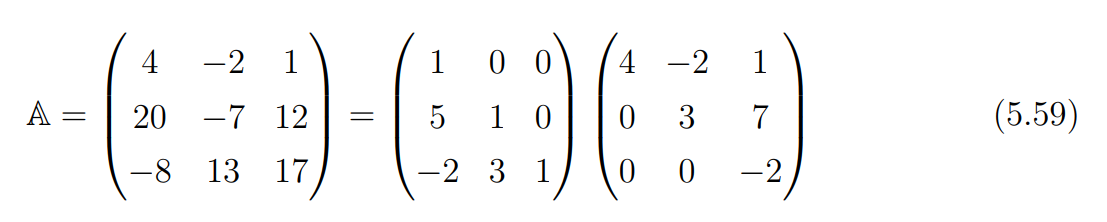

In [262]:
import numpy as np

A = np.array([[4, -2, 1],
              [20, -7, 12],
              [-8, 13, 17]], dtype=float)


n = A.shape[0]
L = np.eye(n)
U = A.copy()


for i in range(n):
    for j in range(i+1, n):

        L[j, i] = U[j, i] / U[i, i]

        U[j, i:] = U[j, i:] - L[j, i] * U[i, i:]


print("A:")
print(A)
print("\nL:")
print(L)
print("\nU:")
print(U)


A:
[[ 4. -2.  1.]
 [20. -7. 12.]
 [-8. 13. 17.]]

L:
[[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]]

U:
[[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [263]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Functions for solving the system of equations
G1 = (lambda x, y, z: 3*x - y - z - 1.,
      lambda x, y, z: -x + 3*y + z - 3.,
      lambda x, y, z: 2*x + y + 4*z - 7.)

def GetF(G, r):
    return np.array([G[i](r[0], r[1], r[2]) for i in range(r.shape[0])])

def Metric(G, r):
    return 0.5 * np.linalg.norm(GetF(G, r)) ** 2

# Function to calculate the Jacobian using finite differences
def GetJacobian(G, r, h=1e-3):
    n = r.shape[0]
    J = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            rf, rb = r.copy(), r.copy()
            rf[j] += h
            rb[j] -= h
            J[i, j] = (G[i](rf[0], rf[1], rf[2]) - G[i](rb[0], rb[1], rb[2])) / (2 * h)

    return J

# Function to plot during minimization
def Plotter(e):
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.set_title(f'Epoch: {e}', fontsize=10)
    return fig, ax

# Minimization function using gradient descent
def Minimizer(G, r, lr=1e-5, epochs=10, error=1e-4):
    metric = Metric(G, r)
    it = 0

    while metric > error and it < epochs:
        J = GetJacobian(G, r)
        r -= lr * J.T @ GetF(G, r)
        metric = Metric(G, r)

        # Plotting every 2 iterations
        if it % 2 == 0:
            clear_output(wait=True)
            fig, ax = Plotter(it)
            ax.plot(r, marker='o')
            plt.show()
            time.sleep(0.5)

        it += 1

    return r, it

# Test the Minimizer
initial_guess = np.array([1., 1., 1.])
solution, iterations = Minimizer(G1, initial_guess)
print(f"Solution: {solution}, Iterations: {iterations}")


Solution: [1. 1. 1.], Iterations: 0


**Test de comparación de los valores y espacios propios del sistema de ecuaciones.**

In [264]:
A = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 5]])

# NumPy eigenvalue calculation
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Your Jacobi method would follow similar steps for iterative updates, but NumPy is the easier solution for comparison.


Eigenvalues: [6.89510652 3.39729507 1.70759841]
Eigenvectors:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


**Punto 10. Código con el método de Jacobi**

In [265]:
import numpy as np
from math import sqrt, atan2, pi

def Jacobi(A, tol=1.0e-9, max_iterations=100):

    def maxElem(A):
        n = len(A)
        Amax = 0.0
        for i in range(n - 1):
            for j in range(i + 1, n):
                if abs(A[i, j]) >= Amax:
                    Amax = abs(A[i, j])
                    k = i
                    l = j
        return Amax, k, l


    def rotate(A, p, k, l):
        n = len(A)
        if A[k, k] == A[l, l]:
            theta = pi / 4  # Cuando A_kk == A_ll
        else:
            theta = 0.5 * atan2(2 * A[k, l], A[l, l] - A[k, k])


        c = np.cos(theta)
        s = np.sin(theta)

        # A con la rotacion
        for i in range(n):
            if i != k and i != l:
                A_ik = A[i, k]
                A_il = A[i, l]
                A[i, k] = c * A_ik - s * A_il
                A[k, i] = A[i, k]
                A[i, l] = s * A_ik + c * A_il
                A[l, i] = A[i, l]

        #Elementos diagonales
        A_kk = A[k, k]
        A_ll = A[l, l]
        A_kl = A[k, l]
        A[k, k] = c**2 * A_kk - 2 * s * c * A_kl + s**2 * A_ll
        A[l, l] = s**2 * A_kk + 2 * s * c * A_kl + c**2 * A_ll
        A[k, l] = 0.0
        A[l, k] = 0.0

        # Vectores propios
        for i in range(n):
            p_ik = p[i, k]
            p_il = p[i, l]
            p[i, k] = c * p_ik - s * p_il
            p[i, l] = s * p_ik + c * p_il

    n = len(A)
    p = np.identity(n)  # Matrix de vectores propios
    for i in range(max_iterations):
        Amax, k, l = maxElem(A)
        if Amax < tol:
            return np.diagonal(A), p
        rotate(A, p, k, l)  # Rotacion a 0 desde A[k, l]

    print('El método no converge')

# Example matrix A
A = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 5]])


eigenvalues, eigenvectors = Jacobi(A, tol=1e-10)

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:\n', eigenvectors)

# Comparando con numpy
eigvals_np, eigvecs_np = np.linalg.eig(A)
print("\nNumPy Eigenvalues:", eigvals_np)
print("NumPy Eigenvectors:\n", eigvecs_np)


Eigenvalues: [3 1 6]
Eigenvectors:
 [[ 0.92387953  0.          0.38268343]
 [-0.20118859  0.85065081  0.48571221]
 [-0.32552997 -0.52573111  0.78589887]]

NumPy Eigenvalues: [3. 1. 6.]
NumPy Eigenvectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Punto 12**

In [266]:
G1=(lambda x,y:  np.log(x**2 + y**2) - np.sin(x * y) - (np.log(2) + np.log(np.pi)), \
    lambda x,y: np.exp(x - y) + np.cos(x * y))

In [267]:
G2=(lambda x,y,z: 6*x - 2*np.cos(y * z) - 1,
    lambda x,y,z: 9*y + np.sqrt((x**2) + np.sin(z) + 1.06) + 0.9,
    lambda x,y,z: 60*z + 3*np.exp(-x * y) + 10 * np.pi - 3)

In [268]:
#Descenso del gradiente
def GetF(G,r):
  n = r.shape[0]
  v = np.zeros(n)

  for i in range(n):
    v[i] = G[i](*r)
  return v

In [269]:
GetF(G1,np.array([2.,2.]))

array([0.99836697, 0.34635638])

In [270]:
GetF(G2,np.array([0.,0.,0.]))

array([-3.        ,  1.92956301, 31.41592654])

In [271]:
def Metrica(Gi):
  return 0.5*np.linalg.norm(Gi)**2

In [272]:
def Jacobiano(f,r,h=1e-3):

  n = r.shape[0]
  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):
      rf = r.copy()
      rb = r.copy()

      rf[j] +=h
      rb[j] -= h

      J[i,j] = (f[i](*rf) - f[i](*rb))/(2*h)

  return J

In [273]:
Jacobian = Jacobiano(G1,np.array([2.,2.]))
print(Jacobian)
Jacobian2 = Jacobiano(G2,np.array([0.,0.,0.]))
print(Jacobian2)

[[1.80728635 1.80728635]
 [2.51360415 0.51360381]]
[[ 6.         0.         0.       ]
 [ 0.         9.         0.4856429]
 [ 0.         0.        60.       ]]


In [274]:
def Minimizer(f,r,lr=1e-1,epochs=int(1e3),error=1e-6):
  metric = 1
  it = 0

  while metric > error and it < epochs:
        Gi = GetF(f, r)
        J = Jacobiano(f, r)
        if np.isclose(np.linalg.det(J), 0):
            print("El Jacobiano es singular.")
            break
        delta_r = np.linalg.lstsq(J, -Gi)[0]

        r += lr * delta_r
        metric = Metrica(Gi)

        it += 1
  return r,it

In [275]:
Sistema1 = Minimizer(G1,np.array([2.,2.]))
print(Sistema1)

(array([1.77293   , 1.77247343]), 64)


<ipython-input-274-2fda5508fb8f>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  delta_r = np.linalg.lstsq(J, -Gi)[0]


In [276]:
Solve = Sistema1[0]
print(Solve)
f1 = GetF(G1,Solve)
print(f1)

[1.77293    1.77247343]
[0.00115833 0.00045706]


In [277]:
#Sistema 2 con Descenso de gradiente
sistema2 = Minimizer(G2,np.array([0.,0.,0.]))
print(sistema2)

(array([ 0.49812677, -0.19959796, -0.52880646]), 97)


<ipython-input-274-2fda5508fb8f>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  delta_r = np.linalg.lstsq(J, -Gi)[0]


In [278]:
Solve = sistema2[0]
print(Solve)
f2 = GetF(G2,Solve)
print(f2)

[ 0.49812677 -0.19959796 -0.52880646]
[-1.09215442e-04  7.08660169e-05  1.14598540e-03]


In [279]:
#Newton Raphson
def NewtonRaphson(f,r,tol=1e-6, itmax=100):
    it = 0
    fr = 1
    while np.linalg.norm(fr) > tol and it < itmax:
          fr = GetF(f, r)
          J = Jacobiano(f, r)
          if np.isclose(np.linalg.det(J), 0):
            print("El Jacobiano es singular.")
            break
          Jinv = np.linalg.inv(J)
          r = r - Jinv @ fr
          it += 1
    return r, it

In [280]:
#Sistema 1 utilizando Newton Raphson
Sist1_NR = NewtonRaphson(G1,np.array([2.,2.]))
print(Sist1_NR)
R = Sist1_NR[0]
print(R)
f1NR = GetF(G1,R)
print(f1NR)


(array([1.77245385, 1.77245385]), 6)
[1.77245385 1.77245385]
[4.4408921e-16 0.0000000e+00]


In [281]:
#Sistema 2
Sist2_NR = NewtonRaphson(G2,np.array([0,0,0]))
print(Sist2_NR)
R = Sist2_NR[0]
print(R)
f2NR = GetF(G2,R)
print("El valor de la matriz en ese punto es",f2NR)

El Jacobiano es singular.
(array([0, 0, 0]), 0)
[0 0 0]
El valor de la matriz en ese punto es [-3.          1.92956301 31.41592654]


**Punto 13**
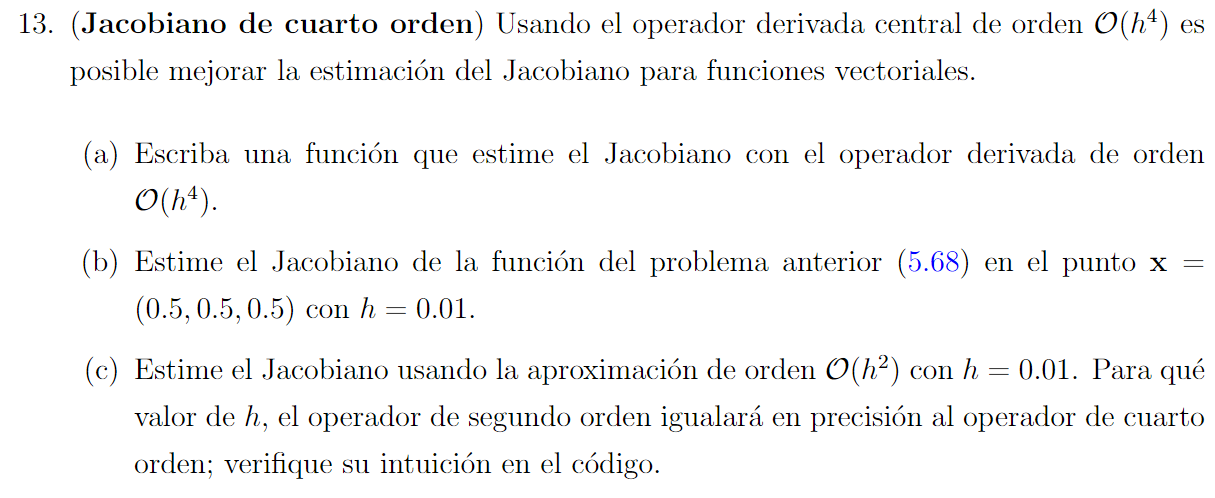

In [282]:
G2=(lambda x,y,z: 6*x - 2*np.cos(y * z) - 1,
    lambda x,y,z: 9*y + np.sqrt((x**2) + np.sin(z) + 1.06) + 0.9,
    lambda x,y,z: 60*z + 3*np.exp(-x * y) + 10 * np.pi - 3)

In [283]:
# Función para calcular el Jacobiano de cuarto orden
def Jacobiano_h4(G, r, h):
    n = r.shape[0]
    J = np.zeros((n, n))

    for i in range(n):
      for j in range(n):
        rf2 = r.copy()
        rf = r.copy()
        rb = r.copy()
        rb2 = r.copy()

        rf2[j] += 2 * h
        rf[j] += h
        rb[j] -= h
        rb2[j] -= 2 * h

        J[i, j] = (G[i](*rb2) - 8 * G[i](*rb) + 8 * G[i](*rf) - G[i](*rf2)) / (12 * h)

    return J

In [284]:
X = np.array([0.5, 0.5, 0.5])
Jorden4 = Jacobiano_h4(G2, X, h=0.01)

print("Jacobiano de cuarto orden:")
print(Jorden4)

Jacobiano de cuarto orden:
[[ 6.          0.24740396  0.24740396]
 [ 0.37377753  9.          0.32802064]
 [-1.16820117 -1.16820117 60.        ]]


In [285]:
#Función del Jacobiano de segundo grado
def Jacobiano(f,r,h):

  n = r.shape[0]
  J = np.zeros((n,n))

  for i in range(n):
    for j in range(n):
      rf = r.copy()
      rb = r.copy()

      rf[j] +=h
      rb[j] -= h

      J[i,j] = (f[i](*rf) - f[i](*rb))/(2*h)

  return J

Jorden2 = Jacobiano(G2, X, h=0.01)

print("Jacobiano de segundo orden:")
print(Jorden2)


Jacobiano de segundo orden:
[[ 6.          0.24740293  0.24740293]
 [ 0.37376854  9.          0.32801836]
 [-1.16820604 -1.16820604 60.        ]]


In [286]:
J2 = Jacobiano(G2, X, h=0.00001)
J4 = Jacobiano_h4(G2, X, h=0.01)
print(J2-J4)

[[-2.73123746e-11  3.23255311e-12  3.23255311e-12]
 [ 9.77018411e-10 -2.98356895e-11 -3.29958283e-11]
 [ 3.21520588e-11  3.21520588e-11  2.15045759e-10]]


In [287]:
# Comparación la precisión entre segundo orden y cuarto orden
def Error(G, r, hi):
    errores = []
    for h in hi:
        Jh2 = Jacobiano(G, r, h)
        Jh4 = Jacobiano_h4(G, r, h)
        error = np.linalg.norm(Jh2 - Jh4)
        errores.append(error)

        print(f"h = {h}: Error relativo = {errores}")

    return errores


X = np.array([0.5, 0.5, 0.5])
h_vals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5,1e-6]
Error(G2, X, h_vals)


h = 0.1: Error relativo = [0.0011545228301443563]
h = 0.01: Error relativo = [0.0011545228301443563, 1.1637563400402815e-05]
h = 0.001: Error relativo = [0.0011545228301443563, 1.1637563400402815e-05, 1.1638392387356853e-07]
h = 0.0001: Error relativo = [0.0011545228301443563, 1.1637563400402815e-05, 1.1638392387356853e-07, 1.1636707728032106e-09]
h = 1e-05: Error relativo = [0.0011545228301443563, 1.1637563400402815e-05, 1.1638392387356853e-07, 1.1636707728032106e-09, 2.4006170414867067e-10]
h = 1e-06: Error relativo = [0.0011545228301443563, 1.1637563400402815e-05, 1.1638392387356853e-07, 1.1636707728032106e-09, 2.4006170414867067e-10, 3.113026969778728e-09]


[0.0011545228301443563,
 1.1637563400402815e-05,
 1.1638392387356853e-07,
 1.1636707728032106e-09,
 2.4006170414867067e-10,
 3.113026969778728e-09]

In [288]:
print("El valor de h debería encontrarse entre 1e-4 y 1e-5")

El valor de h debería encontrarse entre 1e-4 y 1e-5


**Punto 14**

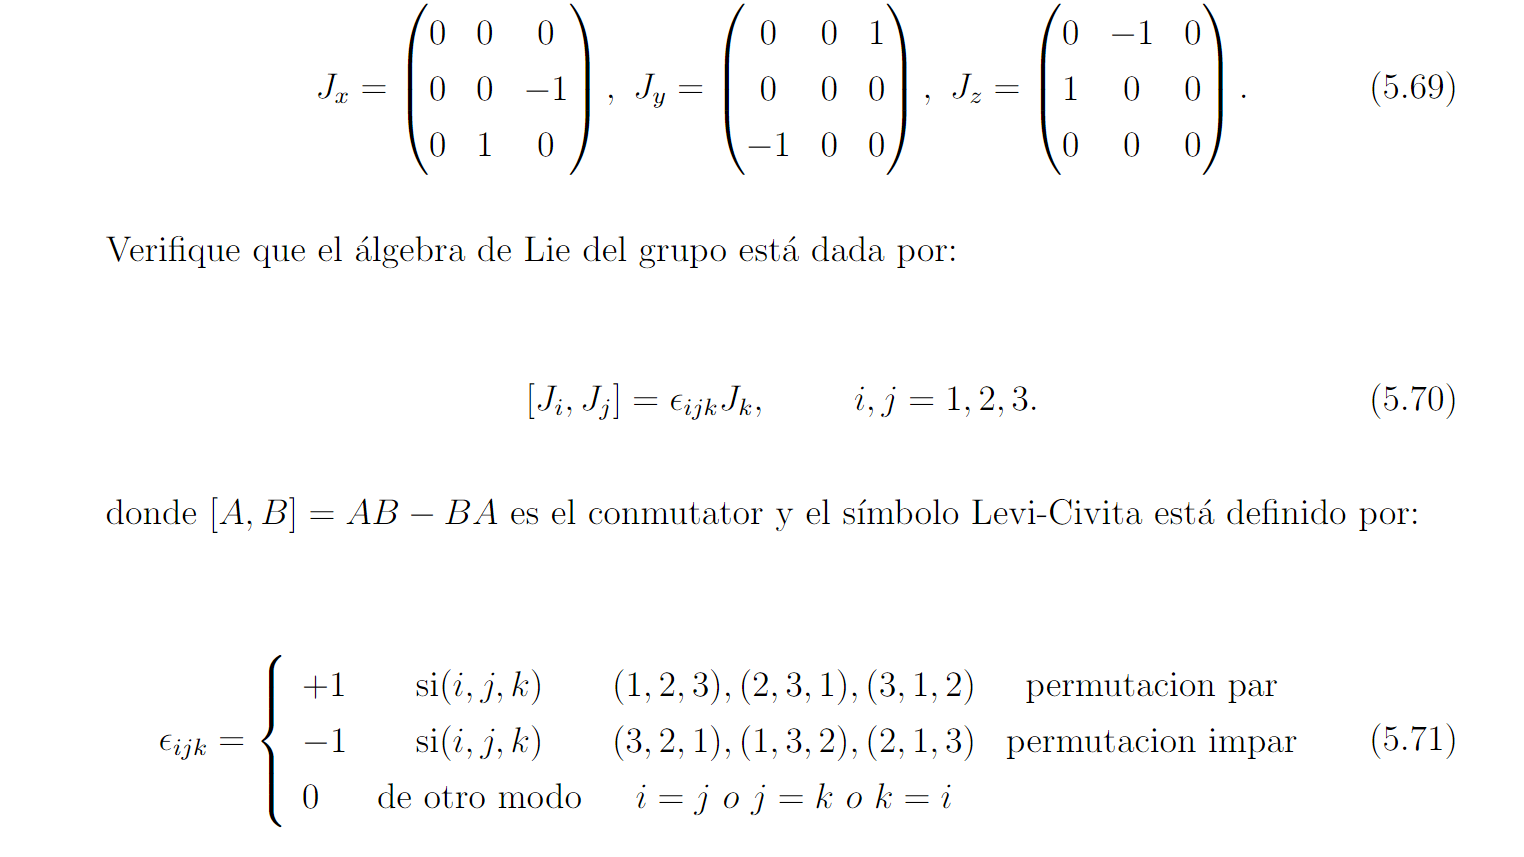

In [289]:
import sympy as sp

In [295]:
Jx = sp.Matrix([[0,0,0],[0,0,-1],[0,1,0]])
Jy = sp.Matrix([[0,0,1],[0,0,0],[-1,0,0]])
Jz = sp.Matrix([[0,-1,0],[1,0,0],[0,0,0]])
J = [Jx,Jy,Jz]

In [291]:
def conmutador(A, B):
    return A*B - B*A

In [296]:
for i in range(3):
    for j in range(3):
        conmutador_ij = conmutador(J[i], J[j])
        print(f"Conmutador [J_{i+1}, J_{j+1}]:")
        sp.pprint(conmutador_ij)
        print()

Conmutador [J_1, J_1]:
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

Conmutador [J_1, J_2]:
⎡0  -1  0⎤
⎢        ⎥
⎢1  0   0⎥
⎢        ⎥
⎣0  0   0⎦

Conmutador [J_1, J_3]:
⎡0  0  -1⎤
⎢        ⎥
⎢0  0  0 ⎥
⎢        ⎥
⎣1  0  0 ⎦

Conmutador [J_2, J_1]:
⎡0   1  0⎤
⎢        ⎥
⎢-1  0  0⎥
⎢        ⎥
⎣0   0  0⎦

Conmutador [J_2, J_2]:
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

Conmutador [J_2, J_3]:
⎡0  0  0 ⎤
⎢        ⎥
⎢0  0  -1⎥
⎢        ⎥
⎣0  1  0 ⎦

Conmutador [J_3, J_1]:
⎡0   0  1⎤
⎢        ⎥
⎢0   0  0⎥
⎢        ⎥
⎣-1  0  0⎦

Conmutador [J_3, J_2]:
⎡0  0   0⎤
⎢        ⎥
⎢0  0   1⎥
⎢        ⎥
⎣0  -1  0⎦

Conmutador [J_3, J_3]:
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦



In [298]:
print(f"Conmutador [J_i, J_j]=0 donde i=j")
for i in range(3):
    conmutador_ii = conmutador(J[i], J[i])
    sp.pprint(conmutador_ii)
    print()

Conmutador [J_i, J_j]=0 donde i=j
⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

